In [160]:
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import spacy
sp = spacy.load('en_core_web_sm')

import re

from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer

englishStemmer=SnowballStemmer("english")

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfVectorizer

import seaborn as sns
import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guillemmirabentrubinat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guillemmirabentrubinat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/guillemmirabentrubinat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [161]:
def klug_lowcaser(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

def stripper(word):
    only_chars = re.sub(r'\W+', '', word)
    return only_chars

def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

# Choose Lemmatization or Stemming HERE BELOW:

In [162]:
""" Write 'lemm' if you want the pipeline to apply lemmatization.
    Write 'stemm' if you want the pipeline to apply stemming. """

lemm_stemm = 'lemm'

In [163]:
df = pd.read_csv('20240203_booking_final.csv')

df['descriptions'] = df['descriptions'].apply(lambda x: str(x))

#display(df.head())
#display(df)

In [164]:
#df = df[:5]

display(df)

,name,rating,num_reviews,neighborhood,dist_from_center,price,other,is_Barna,is_Merce_time,short_description,descriptions
0,Room Mate Gerard,8.8,2783.0,Eixample,700,1730,"Subway Access, Beach Nearby",1,1,Junior Suite\nPrivate suite • 1 bedroom • 1 li...,You're eligible for a Genius discount at Room ...
1,Sonder Los Arcos,8.4,149.0,Ciutat Vella,1000,1530,"Subway Access, Beach Nearby",1,1,Queen Room with Two Queen Beds\n2 queen beds\n...,Ideally located in the Ciutat Vella district o...
2,Occidental Barcelona 1929,8.9,4066.0,Montjuïc,2300,909,Subway Access,1,1,Superior Double Room\nBeds: 1 double or 2 twin...,You're eligible for a Genius discount at Occid...
3,Hotel Alimara,8.3,3892.0,Guinardó,5500,749,Subway Access,1,1,Double Room\n1 queen bed\nFree cancellation,You're eligible for a Genius discount at Hotel...
4,Weflating City Center,8.8,1573.0,Eixample,500,978,"Subway Access, Beach Nearby",1,1,Economy Double Room\n2 bunk beds\nFree cancell...,You're eligible for a Genius discount at Wefla...
...,...,...,...,...,...,...,...,...,...,...,...
1148,Hotel Martini,6.9,607.0,Capodichino,6300,432,NaN,0,0,Double Room\n1 queen bed\nBreakfast included,"Set in Casavatore, 3.7 mi from Naples, Hotel M..."
1149,Eurostars Hotel Excelsior,8.6,3221.0,Lungomare Caracciolo,1500,3199,NaN,0,0,Classic Double Room\n1 king bed,You're eligible for a Genius discount at Euros...
1150,Hotel Barbato,5.8,110.0,Capodichino,5800,459,NaN,0,0,"Standard Triple Room\n2 beds (1 twin, 1 full)\...","Set 2.5 mi from Naples Capodichino Airport, Ho..."
1151,Hotel Serena,7.9,18.0,NaN,5500,528,NaN,0,0,Double Room\n1 queen bed\nBreakfast included,You're eligible for a Genius discount at Hotel...


In [165]:
df_texts = [c for c in df['descriptions']]

tokenized_texts = [nltk.word_tokenize(text) for text in df_texts]

#display(tokenized_texts)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1153 non-null   object 
 1   rating             1140 non-null   float64
 2   num_reviews        1140 non-null   float64
 3   neighborhood       1134 non-null   object 
 4   dist_from_center   1153 non-null   int64  
 5   price              1153 non-null   int64  
 6   other              770 non-null    object 
 7   is_Barna           1153 non-null   int64  
 8   is_Merce_time      1153 non-null   int64  
 9   short_description  1153 non-null   object 
 10  descriptions       1153 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 99.2+ KB


None

In [166]:
""" LEMMATIZER """

if lemm_stemm == 'lemm':
    
    lemmat_texts = []
    
    for text in tokenized_texts:
        TEMP_lemmatized_text = []
        for word in text:
            TEMP_lemmatized_text.append(lemmatizer.lemmatize(word))
        lemmat_texts.append(" ".join(TEMP_lemmatized_text))
        
    display(lemmat_texts[:5])
    
    TEMP_lemm2_texts = []
    
    for text in lemmat_texts:
        sp_text = sp(text)
        TEMP_lemm_text = []
        
        for word in sp_text:
            TEMP_lemm_text.append(word.lemma_)
        
        TEMP_lowcase = [klug_lowcaser(stripper(w)) for w in TEMP_lemm_text if stripper(w)]
        
        TEMP_lemm2_texts.append(TEMP_lowcase)
        
    for t in TEMP_lemm2_texts[:5]:
        print(t)
    
    ESSENCE_texts = TEMP_lemm2_texts
else:
    pass

["You 're eligible for a Genius discount at Room Mate Gerard ! To save at this property , all you have to do is sign in . Room Mate Gerard in Barcelona provides accommodation with a seasonal outdoor swimming pool and a fitness center . It feature a sun terrace and location , set in the Eixample district , near attraction such a Tivoli Theater and within 2297 foot of Portal de l'Angel . At the hotel all room offer a simple yet elegant décor . They come with a wardrobe and a flat-screen TV . Air-conditioning is featured , and certain room include a balcony . All unit include a private bathroom with shower and free toiletry . A buffet breakfast is served every morning at the property . Speaking English and Spanish , staff at the 24-hour front desk can help you plan your stay . Other facility include portable WiFi . Plaça Catalunya is a 9-minute walk from the accommodation . Barcelona El Prat Airport is 8.1 mi away . Couples in particular like the location – they rated it 9.3 for a two-per

['you', 'be', 'eligible', 'for', 'a', 'genius', 'discount', 'at', 'room', 'mate', 'gerard', 'to', 'save', 'at', 'this', 'property', 'all', 'you', 'have', 'to', 'do', 'be', 'sign', 'in', 'room', 'mate', 'gerard', 'in', 'barcelona', 'provide', 'accommodation', 'with', 'a', 'seasonal', 'outdoor', 'swimming', 'pool', 'and', 'a', 'fitness', 'center', 'it', 'feature', 'a', 'sun', 'terrace', 'and', 'location', 'set', 'in', 'the', 'eixample', 'district', 'near', 'attraction', 'such', 'a', 'tivoli', 'theater', 'and', 'within', '2297', 'foot', 'of', 'portal', 'de', 'langel', 'at', 'the', 'hotel', 'all', 'room', 'offer', 'a', 'simple', 'yet', 'elegant', 'décor', 'they', 'come', 'with', 'a', 'wardrobe', 'and', 'a', 'flat', 'screen', 'tv', 'air', 'conditioning', 'be', 'feature', 'and', 'certain', 'room', 'include', 'a', 'balcony', 'all', 'unit', 'include', 'a', 'private', 'bathroom', 'with', 'shower', 'and', 'free', 'toiletry', 'a', 'buffet', 'breakfast', 'be', 'serve', 'every', 'morning', 'at', 't

In [167]:
""" STOPWORD REMOVAL """

if lemm_stemm == 'lemm':
    TEMP_corpus_to_stop = ESSENCE_texts
    
elif lemm_stemm == 'stemm':
    TEMP_corpus_to_stop = []
    
    for text in tokenized_texts:
        TEMP_text_to_lower = [klug_lowcaser(stripper(w)) for w in text if stripper(w)]
        TEMP_corpus_to_stop.append(TEMP_text_to_lower)
    
else:
    pass


stopped_corpus = []

for text in TEMP_corpus_to_stop:
    stopped = [w for w in text if w not in set(stopwords.words('english'))]
    stopped_corpus.append(stopped)

for t in stopped_corpus[:5]:
    print(t)

['eligible', 'genius', 'discount', 'room', 'mate', 'gerard', 'save', 'property', 'sign', 'room', 'mate', 'gerard', 'barcelona', 'provide', 'accommodation', 'seasonal', 'outdoor', 'swimming', 'pool', 'fitness', 'center', 'feature', 'sun', 'terrace', 'location', 'set', 'eixample', 'district', 'near', 'attraction', 'tivoli', 'theater', 'within', '2297', 'foot', 'portal', 'de', 'langel', 'hotel', 'room', 'offer', 'simple', 'yet', 'elegant', 'décor', 'come', 'wardrobe', 'flat', 'screen', 'tv', 'air', 'conditioning', 'feature', 'certain', 'room', 'include', 'balcony', 'unit', 'include', 'private', 'bathroom', 'shower', 'free', 'toiletry', 'buffet', 'breakfast', 'serve', 'every', 'morning', 'property', 'speak', 'english', 'spanish', 'staff', '24', 'hour', 'front', 'desk', 'help', 'plan', 'stay', 'facility', 'include', 'portable', 'WiFi', 'plaça', 'catalunya', '9', 'minute', 'walk', 'accommodation', 'barcelona', 'el', 'prat', 'airport', '81', 'mi', 'away', 'couple', 'particular', 'like', 'loca

In [168]:
""" STEMMING """

if lemm_stemm == 'stemm':
    steamed_corpus = []
    
    for t in stopped_corpus:
        steamed = [englishStemmer.stem(w) for w in t]
        steamed_corpus.append(steamed)
        
    for t in steamed_corpus[:5]:
        print(t)
    
    ESSENCE_corpus = steamed_corpus
elif lemm_stemm == 'lemm':
    ESSENCE_corpus = stopped_corpus
else:
    pass

In [169]:
""" VECTORIZING """
vocab_ESSENCE, index = {}, 1  # start indexing from 1
for doc in ESSENCE_corpus:
    for token in doc:
        if token not in vocab_ESSENCE:
            vocab_ESSENCE[token] = index
            index += 1

vocab_ESSENCE_size = len(vocab_ESSENCE)
print(vocab_ESSENCE)
print(" ")
print("Total size of vocabulary is:", vocab_ESSENCE_size)

vectors=[]
for doc in ESSENCE_corpus:
    vectors.append(vectorize(doc, vocab_ESSENCE))

df_vectors = pd.DataFrame(vectors, columns = vocab_ESSENCE.keys(), index = range(1,len(vectors)+1))
display(df_vectors)
display(df_vectors.transpose())

{'eligible': 1, 'genius': 2, 'discount': 3, 'room': 4, 'mate': 5, 'gerard': 6, 'save': 7, 'property': 8, 'sign': 9, 'barcelona': 10, 'provide': 11, 'accommodation': 12, 'seasonal': 13, 'outdoor': 14, 'swimming': 15, 'pool': 16, 'fitness': 17, 'center': 18, 'feature': 19, 'sun': 20, 'terrace': 21, 'location': 22, 'set': 23, 'eixample': 24, 'district': 25, 'near': 26, 'attraction': 27, 'tivoli': 28, 'theater': 29, 'within': 30, '2297': 31, 'foot': 32, 'portal': 33, 'de': 34, 'langel': 35, 'hotel': 36, 'offer': 37, 'simple': 38, 'yet': 39, 'elegant': 40, 'décor': 41, 'come': 42, 'wardrobe': 43, 'flat': 44, 'screen': 45, 'tv': 46, 'air': 47, 'conditioning': 48, 'certain': 49, 'include': 50, 'balcony': 51, 'unit': 52, 'private': 53, 'bathroom': 54, 'shower': 55, 'free': 56, 'toiletry': 57, 'buffet': 58, 'breakfast': 59, 'serve': 60, 'every': 61, 'morning': 62, 'speak': 63, 'english': 64, 'spanish': 65, 'staff': 66, '24': 67, 'hour': 68, 'front': 69, 'desk': 70, 'help': 71, 'plan': 72, 'stay

,eligible,genius,discount,room,mate,gerard,save,property,sign,barcelona,...,single,quadruple,soul,cimarosa,beautifully,hugely,subway,kennedy,aosta,amusement
1,1,1,1,6,2,2,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,6,0,0,0,2,0,3,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,6,0,0,1,3,1,6,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,6,0,0,1,2,1,2,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,3,0,0,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0,0,1,6,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,1,1,1,5,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
1151,0,0,0,6,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,1,1,1,6,0,0,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0


,1,2,3,4,5,6,7,8,9,10,...,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153
eligible,1,0,1,1,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,1
genius,1,0,1,1,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,1
discount,1,0,1,1,1,0,0,1,0,1,...,1,0,0,1,0,1,1,0,1,1
room,6,6,6,6,3,5,3,7,4,4,...,2,4,1,4,0,6,5,6,6,5
mate,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hugely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
subway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kennedy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aosta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
CV_essence_corpus = []
for text in ESSENCE_corpus:
    CV_essence_corpus.append(" ".join(text))

# TF-IDF

## We apply CountVectorizer

In [171]:
cv = CountVectorizer(ngram_range = (1,3), lowercase = False, min_df = 0.01, max_df = 0.5)
cv.fit(df['descriptions'])

cv_text = cv.transform(CV_essence_corpus)
cv_text = cv_text.todense()

df_cv_text = pd.DataFrame(cv_text, columns = cv.get_feature_names_out(), index = range(1,len(cv_text)+1))
display(df_cv_text)

,00,10,10 miles,10 miles from,10 minute,10 minute walk,10 minutes,10 minutes away,10 minutes by,10 minutes walk,...,you to,you to the,you will,you will find,you with,you with the,your,your room,your stay,zone
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dictionary Method

As tf-idf might not be the most relevant for our approach, we want to try dictionary methods.

The simple dictionary method is quite straight-forward regarding the three dummy variables we want to extract. 
It might also prove useful in order to check the level of facilities offered by the hotels.

In [172]:
""" We define a function that will take a description and a key phrase and return 1 if the key phrase is present in the description, and 0 otherwise. """

def key_phrases_dummifier(description, key_phrase: int):
    key_phrases = [
        r"free cancellation",
        r"breakfast included",
        r"no prepayment needed"
    ]
    count = 0

    if re.search(key_phrases[key_phrase], description.lower()):
        count = 1
    else:
        count = 0
    
    return count

# We apply the function

df['Free_Cancellation'] = [key_phrases_dummifier(r, 0) for r in df['short_description']]
df['Breakfast_Included'] = [key_phrases_dummifier(r, 1) for r in df['short_description']]
df['No_Prepayment'] = [key_phrases_dummifier(r, 2) for r in df['short_description']]

display(df.head())

,name,rating,num_reviews,neighborhood,dist_from_center,price,other,is_Barna,is_Merce_time,short_description,descriptions,Free_Cancellation,Breakfast_Included,No_Prepayment
0,Room Mate Gerard,8.8,2783.0,Eixample,700,1730,"Subway Access, Beach Nearby",1,1,Junior Suite\nPrivate suite • 1 bedroom • 1 li...,You're eligible for a Genius discount at Room ...,0,1,0
1,Sonder Los Arcos,8.4,149.0,Ciutat Vella,1000,1530,"Subway Access, Beach Nearby",1,1,Queen Room with Two Queen Beds\n2 queen beds\n...,Ideally located in the Ciutat Vella district o...,0,0,0
2,Occidental Barcelona 1929,8.9,4066.0,Montjuïc,2300,909,Subway Access,1,1,Superior Double Room\nBeds: 1 double or 2 twin...,You're eligible for a Genius discount at Occid...,0,0,0
3,Hotel Alimara,8.3,3892.0,Guinardó,5500,749,Subway Access,1,1,Double Room\n1 queen bed\nFree cancellation,You're eligible for a Genius discount at Hotel...,1,0,0
4,Weflating City Center,8.8,1573.0,Eixample,500,978,"Subway Access, Beach Nearby",1,1,Economy Double Room\n2 bunk beds\nFree cancell...,You're eligible for a Genius discount at Wefla...,1,0,0


In [173]:
""" We check the balance of classes for the dummy variables. """

print(df['Free_Cancellation'].value_counts())
print(df['Breakfast_Included'].value_counts())
print(df['No_Prepayment'].value_counts())

Free_Cancellation
0    755
1    398
Name: count, dtype: int64
Breakfast_Included
0    938
1    215
Name: count, dtype: int64
No_Prepayment
0    941
1    212
Name: count, dtype: int64


### Now onto the creation of a "Facilities" variable

In [174]:
""" We first define our "dictionary" of keywords. """

facility_keywords = [
    ('restaurant', 'restaurants'),  # We want to count both 'restaurant' and 'restaurants' as one mention
    ('fitness', 'gym'),     # Same for gym facilities, as some descriptions mention 'gym' and others 'fitness center', 'fitness club' or other variations
    'parking',
    ('swimming pool', 'rooftop pool'),
    ('spa', 'sauna', 'jacuzzi', 'solarium', 'massage', 'wellness'),
    'terrace',
    ('private pool', 'hot tub'),     # These are separate from the general 'swimming pool' because it refers to a pool that is inside the room
    'air conditioning',
    '24-hour front desk',
    ('disabled', 'wheelchair accessible', 'adapted bath', 'lowered sink', 'grab rails', 'shower chair', 'braille', 'tactile signs', 'visual aids'),
    'room service',
    'airport shuttle',
    'electric vehicle'  # We don't specify 'charging station' because it might be mentioned in different ways, but 'electric vehicle' is only going to appear when there is a charging station
]

# We first define the function that will allow us to count the number of facilities mentioned in the 
# description of each hotel.
def count_facilities(description):
    count = 0
    for keyword in facility_keywords:
        if isinstance(keyword, tuple):
            if any(w in description.lower() for w in keyword):
                count += 1
        else:
            if keyword in description.lower():
                count += 1
    
    return count

# Now we apply the function, we count the number of relevant words in the description of each hotel 
# and then we normalize the count by the length of the description.
# Then we standardize the count to make it easier to interpret.
df['Facilities'] = df['descriptions'].apply(count_facilities)
lengths = [len(text) for text in ESSENCE_corpus]
df['Facilities'] = df['Facilities'] / lengths

facilities_std = df['Facilities'].std()
facilities_mean = df['Facilities'].mean()

df['Facilities'] = (df['Facilities'] - facilities_mean) / facilities_std

In [175]:
display(df.head())
display(df['Facilities'].describe())

,name,rating,num_reviews,neighborhood,dist_from_center,price,other,is_Barna,is_Merce_time,short_description,descriptions,Free_Cancellation,Breakfast_Included,No_Prepayment,Facilities
0,Room Mate Gerard,8.8,2783.0,Eixample,700,1730,"Subway Access, Beach Nearby",1,1,Junior Suite\nPrivate suite • 1 bedroom • 1 li...,You're eligible for a Genius discount at Room ...,0,1,0,0.216086
1,Sonder Los Arcos,8.4,149.0,Ciutat Vella,1000,1530,"Subway Access, Beach Nearby",1,1,Queen Room with Two Queen Beds\n2 queen beds\n...,Ideally located in the Ciutat Vella district o...,0,0,0,-2.184302
2,Occidental Barcelona 1929,8.9,4066.0,Montjuïc,2300,909,Subway Access,1,1,Superior Double Room\nBeds: 1 double or 2 twin...,You're eligible for a Genius discount at Occid...,0,0,0,-0.061278
3,Hotel Alimara,8.3,3892.0,Guinardó,5500,749,Subway Access,1,1,Double Room\n1 queen bed\nFree cancellation,You're eligible for a Genius discount at Hotel...,1,0,0,0.749370
4,Weflating City Center,8.8,1573.0,Eixample,500,978,"Subway Access, Beach Nearby",1,1,Economy Double Room\n2 bunk beds\nFree cancell...,You're eligible for a Genius discount at Wefla...,1,0,0,-0.717773


count    1.153000e+03
mean    -2.834776e-16
std      1.000000e+00
min     -2.668500e+00
25%     -5.986447e-01
50%      6.120850e-02
75%      6.928766e-01
max      2.603881e+00
Name: Facilities, dtype: float64

In [176]:
#df.to_csv('booking_final_regression.csv', index = False)

# Summary Statistics

We will now proceed to show some summary statistics and plots for the distribution of the different variables for all the possible combinations of cities and weeks.

In [177]:
''' First we create a four different DataFrames with each of the combinations of cities and weeks.
    Then we print the shape of each of the dataframes. '''

df_bcn_merce = df[(df['is_Barna'] == 1) & (df['is_Merce_time'] == 1)]
df_bcn_control = df[(df['is_Barna'] == 1) & (df['is_Merce_time'] == 0)]
df_nap_merce = df[(df['is_Barna'] == 0) & (df['is_Merce_time'] == 1)]
df_nap_control = df[(df['is_Barna'] == 0) & (df['is_Merce_time'] == 0)]

print(f"Barcelona for La Mercè: {df_bcn_merce.shape}")
print(f"Barcelona for Control: {df_bcn_control.shape}")
print(f"Napoli for La Mercè: {df_nap_merce.shape}")
print(f"Napoli for Control: {df_nap_control.shape}")

Barcelona for La Mercè: (402, 15)
Barcelona for Control: (427, 15)
Napoli for La Mercè: (163, 15)
Napoli for Control: (161, 15)


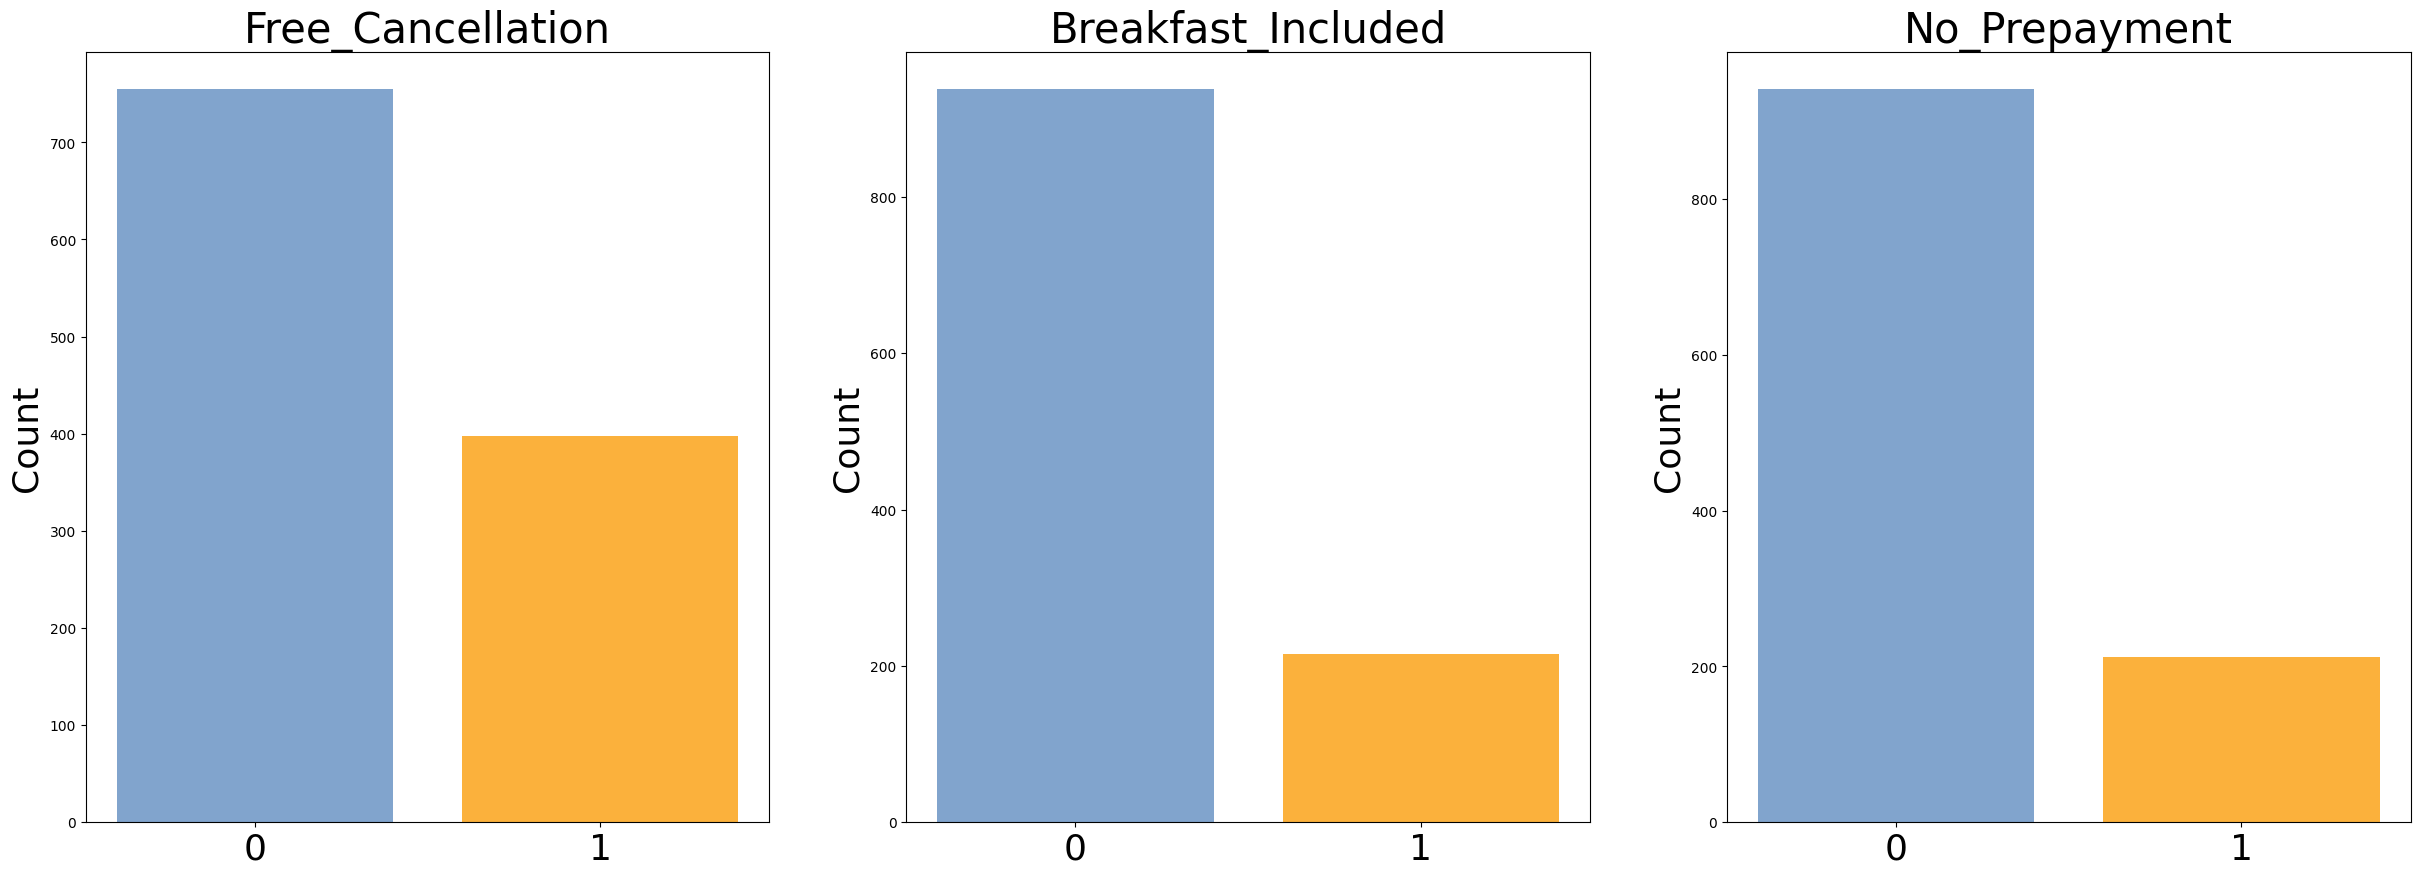

In [178]:
""" First we prepare three plots to show the balance of classes for the dummy variables we extracted
    from the descriptions in the dataframe with all the observations. """

variables_show = ['Free_Cancellation', 'Breakfast_Included', 'No_Prepayment']
colors_to_use = ['#81A4CD', '#FBB13C']
fontsize = 26

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

for i, dummy in enumerate(variables_show):
    counts = df[dummy].value_counts().sort_index()
    axs[i].bar(counts.index, counts.values, color=[colors_to_use[val] for val in counts.index])
    axs[i].set_title(f"{dummy}", fontsize = fontsize + 4)
    axs[i].set_xlabel('', fontsize = fontsize)
    axs[i].set_ylabel("Count", fontsize = fontsize)
    axs[i].set_xticks(counts.index)
    axs[i].set_xticklabels(counts.index, fontsize = fontsize)

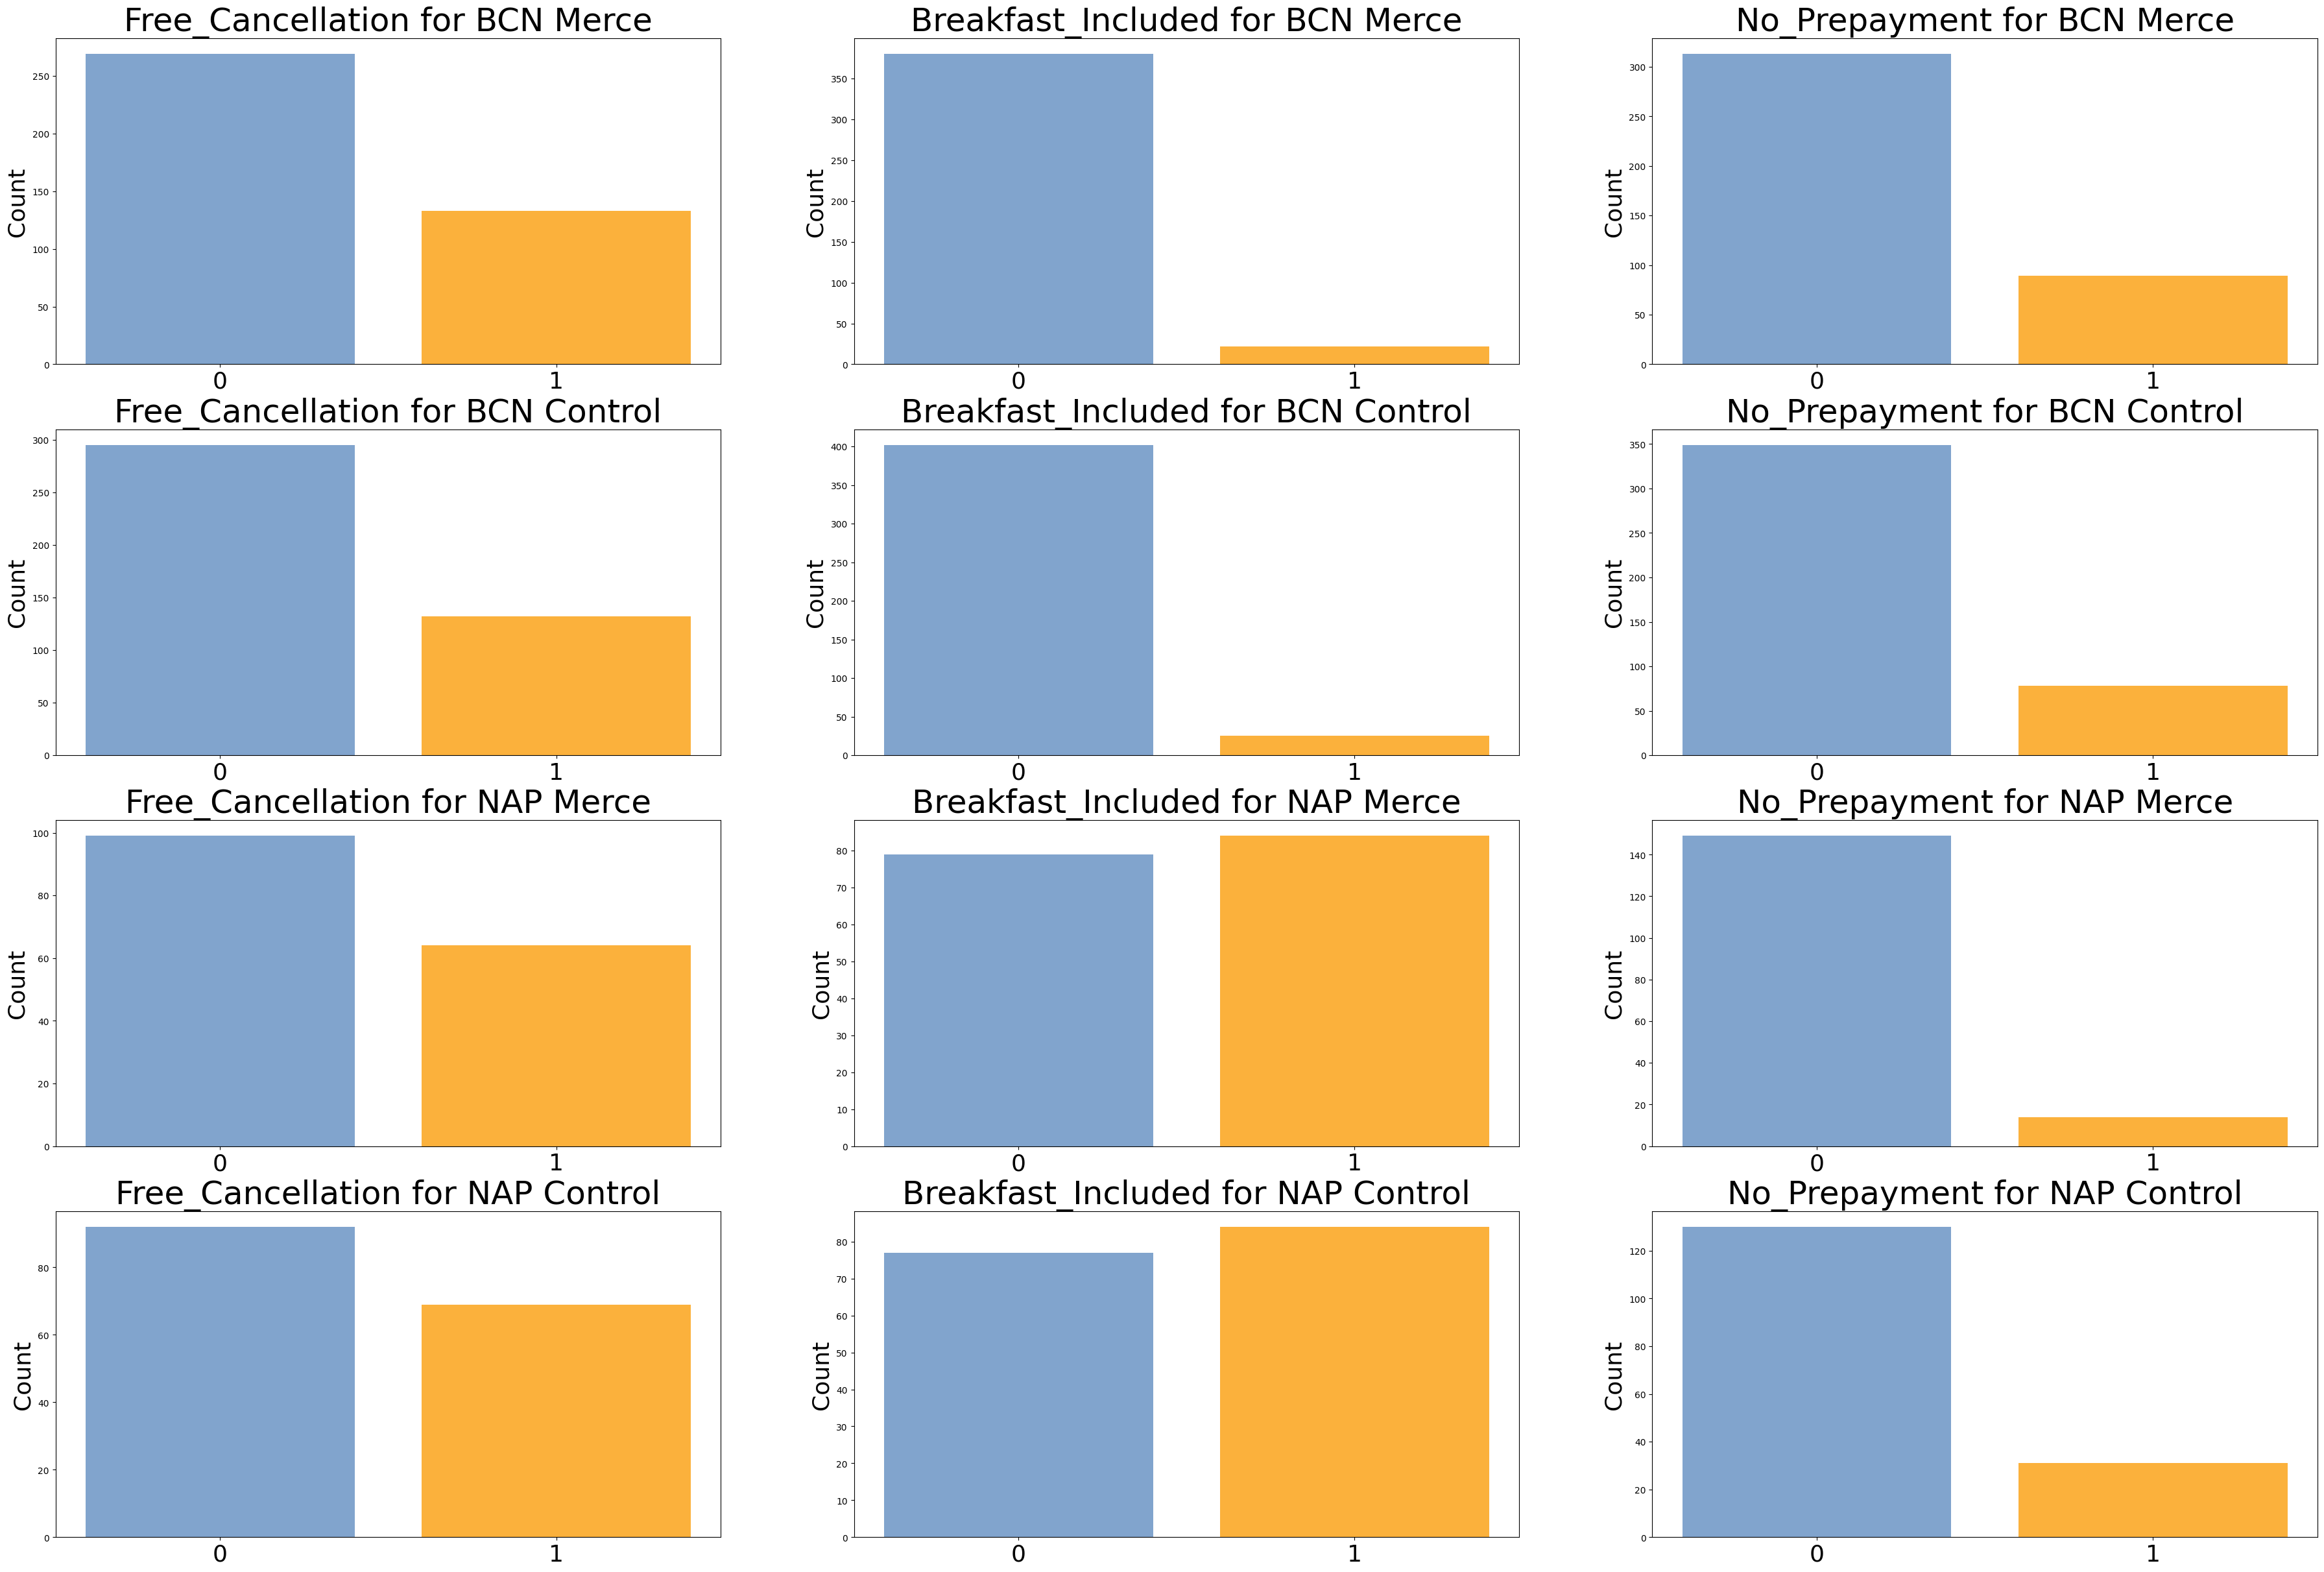

In [179]:
""" We plot the balance for all the dummy variables we extracted from the descriptions. """

# First we define all the lists we are going to iterate over for the plots.
list_dfs = [df_bcn_merce, df_bcn_control, df_nap_merce, df_nap_control]
df_names = ['BCN Merce', 'BCN Control', 'NAP Merce', 'NAP Control']
fontsize = 26

# We prepare the subplots.
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (45, 30))

# We iterate over the DataFrames and the variables to plot the bar plots.
for i, dataf in enumerate(list_dfs):
    for j, dummy in enumerate(variables_show):
        counts = dataf[dummy].value_counts().sort_index()
        axs[i, j].bar(counts.index, counts.values, color=[colors_to_use[val] for val in counts.index])
        axs[i, j].set_title(f"{dummy} for {df_names[i]}", fontsize = fontsize + 10)
        axs[i, j].set_xlabel('', fontsize = fontsize)
        axs[i, j].set_ylabel("Count", fontsize = fontsize)
        axs[i, j].set_xticks(counts.index)
        axs[i, j].set_xticklabels(counts.index, fontsize = fontsize)

# We show the plots.
plt.show()

We can observe how there are no major differences within cities. Some variables differ a little bit but the major differences are found between weeks and within the same city the balances look similar.

In [180]:
''' We create a summary table with the main statistics of the Facilities column for each DataFrame. '''

describe_list = [df['Facilities'].describe() for df in list_dfs]

summary_table = pd.concat(describe_list, axis = 1)
summary_table.columns = ['Barcelona for La Mercè', 'Barcelona for Control', 'Napoli for La Mercè', 'Napoli for Control']

display(summary_table)

,Barcelona for La Mercè,Barcelona for Control,Napoli for La Mercè,Napoli for Control
count,402.000000,427.000000,163.000000,161.000000
mean,0.130020,0.116191,-0.292520,-0.336650
std,0.896144,0.911467,1.163363,1.151223
min,-2.668500,-2.668500,-2.668500,-2.668500
25%,-0.408908,-0.415150,-1.144987,-1.162105
50%,0.109487,0.112536,-0.176303,-0.247509
75%,0.748346,0.720888,0.572401,0.529036
max,2.603881,2.603881,2.479937,2.479937


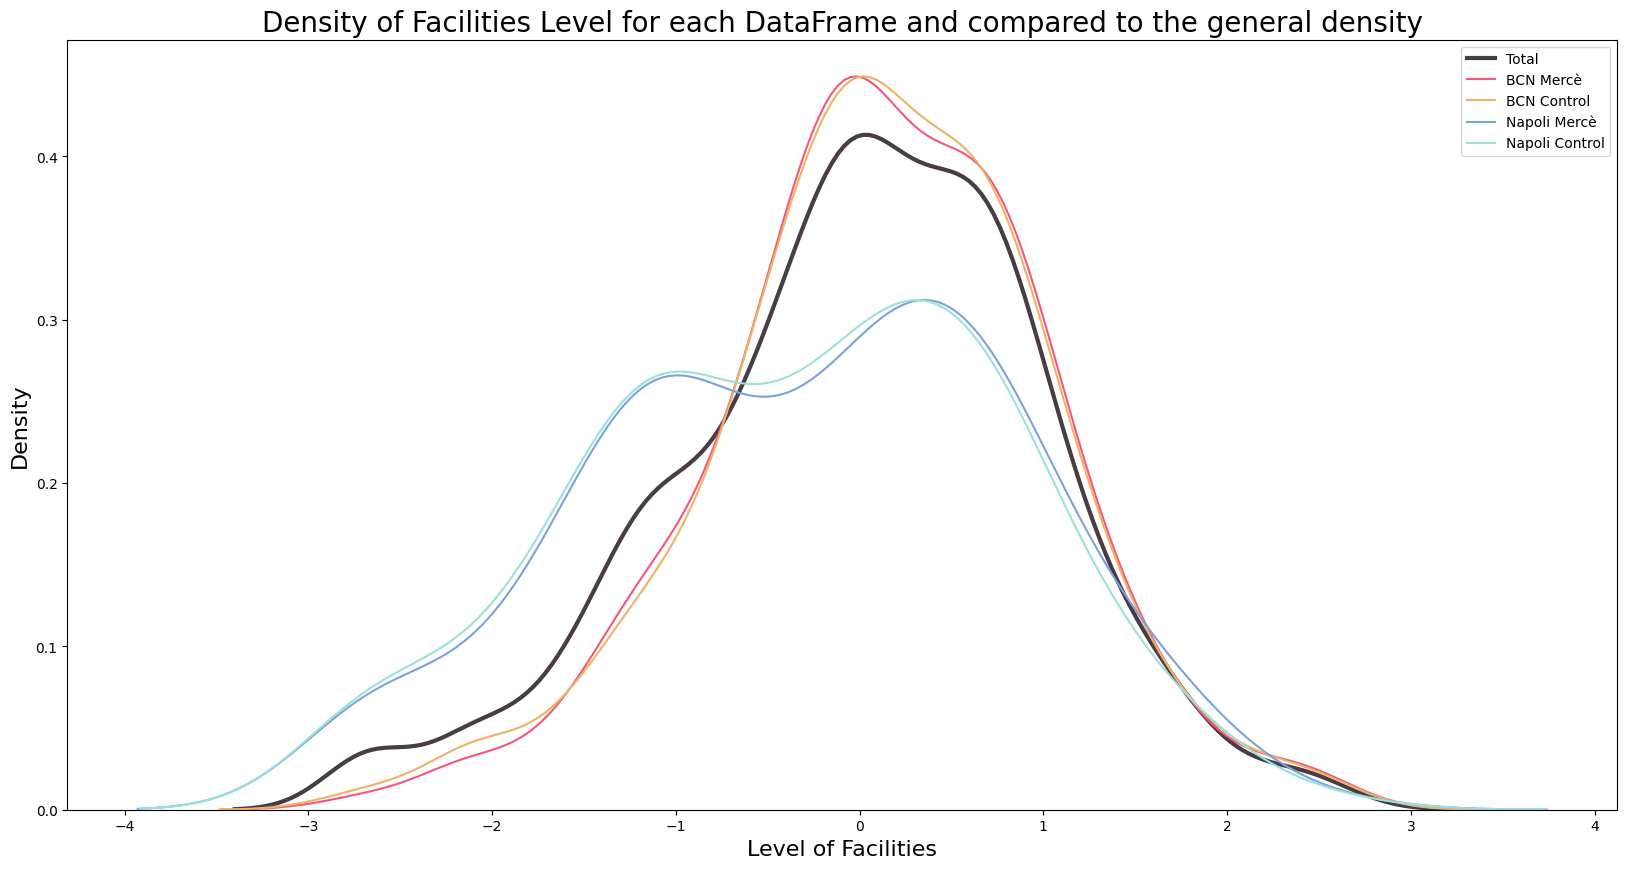

In [181]:
''' We plot a histogram with kernel density estimates applied to the Facilities column for each df to
    easily visualize the previous table. '''

plt.figure(figsize = (20, 10))

main_line_width = 3
second_lines_width = 1.5
fontsize = 16

sns.kdeplot(df['Facilities'], color = '#483C46', linewidth = main_line_width)
sns.kdeplot(df_bcn_merce['Facilities'], color = '#F7567C', linewidth = second_lines_width)
sns.kdeplot(df_bcn_control['Facilities'], color = '#EAB464', linewidth = second_lines_width)
sns.kdeplot(df_nap_merce['Facilities'], color = '#7DA1DB', linewidth = second_lines_width)
sns.kdeplot(df_nap_control['Facilities'], color = '#99E1D9', linewidth = second_lines_width)
plt.legend(['Total', 'BCN Mercè', 'BCN Control', 'Napoli Mercè', 'Napoli Control'])

plt.xlabel('Level of Facilities', fontsize = fontsize)
plt.ylabel('Density', fontsize = fontsize)
plt.title('Density of Facilities Level for each DataFrame and compared to the general density', fontsize = fontsize + 4)
plt.show()

We can observe how, due to having more observations, the hotels from Barcelona weight more on the total and, thus, the curve for the whole set of observations resembles the curves from the hotels in Barcelona. That being said, the fact that hotels from Barcelona and Napoli are different in average was expectable and it is salvageable. Big differences would be very problematic if they were to happen between the two weeks because then that could be implying that there were essential biases between the weeks from the populations being different (i.e. hotels from the control week would be very different that the hotels from "La Mercè" week).

In short, this distributions we are observing are reassuring because they show no major differences between weeks in the same city.